# Introduction to GeoPandas 

In [4]:
import geopandas as gpd 
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter("ignore")

## Read Shape Files into GeoPandas 

In [5]:
# read file 
data = gpd.read_file(r'../shapefiles/districts.shp')

In [6]:
# show data 
data   

,district,geometry
0,"Newry, Mourne and Down","POLYGON ((-5.82139 54.49408, -5.82128 54.49399..."
1,Mid Ulster,"POLYGON ((-6.53263 54.94913, -6.53253 54.94901..."
2,Mid and East Antrim,"POLYGON ((-5.96917 55.05284, -5.96909 55.05284..."
3,Lisburn and Castlereagh,"POLYGON ((-6.08760 54.62414, -6.08699 54.62394..."
4,"Armagh City, Banbridge and Craigavon","POLYGON ((-6.27820 54.54965, -6.27819 54.54960..."
5,Antrim and Newtownabbey,"POLYGON ((-6.16426 54.81062, -6.16405 54.81063..."
6,Ards and North Down,"MULTIPOLYGON (((-5.74192 54.67759, -5.74190 54..."
7,Fermanagh and Omagh,"POLYGON ((-6.99814 54.78009, -6.99806 54.78010..."
8,Derry City and Strabane,"POLYGON ((-7.25762 55.06648, -7.25759 55.06648..."
9,Causeway Coast and Glens,"MULTIPOLYGON (((-6.48405 55.25194, -6.48401 55..."


In [7]:
# type of dataframe 
type(data)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

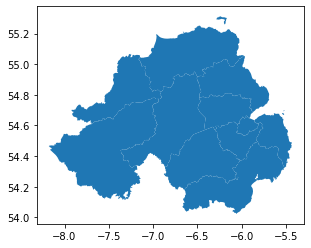

In [8]:
# plot the map 
data.plot() 

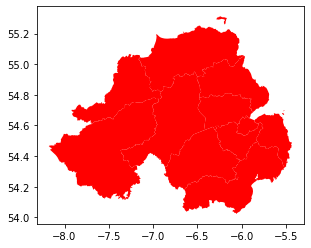

In [7]:
# color 
data.plot(color = "red")

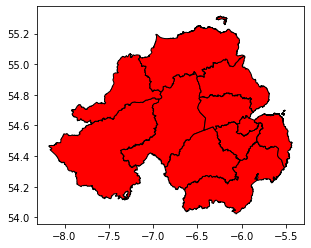

In [8]:
# edge color 
data.plot(color = "red", edgecolor='black')

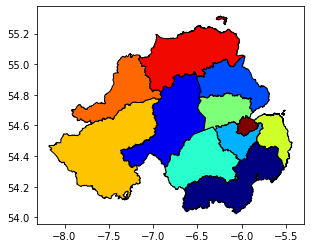

In [11]:
# cmap: https://matplotlib.org/2.0.2/users/colormaps.html
data.plot(color = "red", edgecolor='black', cmap='jet')

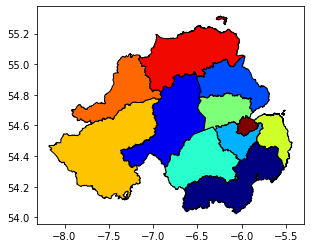

In [28]:
# color by column 
data.plot(color = "red", edgecolor = 'black', cmap= 'jet', column = 'districts')

In [16]:
# read area of interest 
area_of_interest = gpd.read_file(r'../shapefiles/area_of_interest.shp')

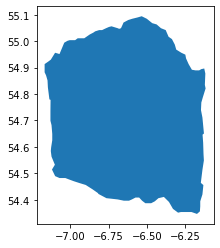

In [18]:
area_of_interest.plot() 

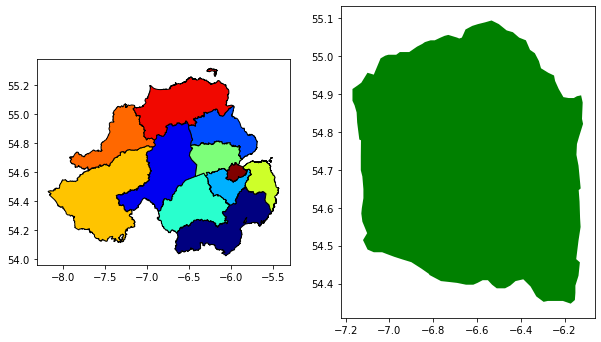

In [31]:
# Plot the figure side by side 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,8)) 
data.plot(ax = ax1, color = "red", edgecolor = 'black', cmap= 'jet', column = 'districts')
area_of_interest.plot(ax = ax2, color='green')

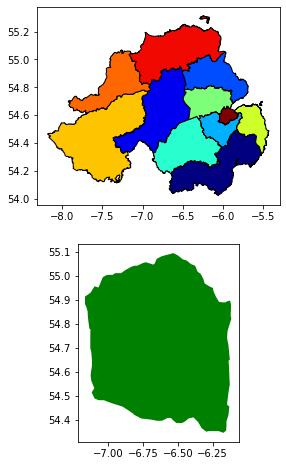

In [32]:
# Plot the figure side by side 
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,8)) 
data.plot(ax = ax1, color = "red", edgecolor = 'black', cmap= 'jet', column = 'districts')
area_of_interest.plot(ax = ax2, color='green')

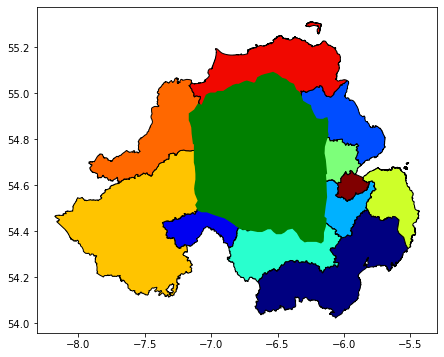

In [35]:
# Plotting multiple layers: area of interest 
fig, ax = plt.subplots(figsize=(10,6)) 
data.plot(ax = ax, color = "red", edgecolor = 'black', cmap= 'jet', column = 'districts')
area_of_interest.plot(ax = ax, color='green')

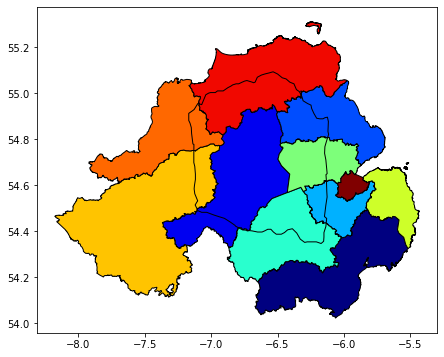

In [36]:
# Plotting multiple layers: area of interest 
fig, ax = plt.subplots(figsize=(10,6)) 
data.plot(ax = ax, color = "red", edgecolor = 'black', cmap= 'jet', column = 'districts')
area_of_interest.plot(ax = ax, color='none', edgecolor = 'black')

In [37]:
atms = gpd.read_file(r"../shapefiles/atms.shp")

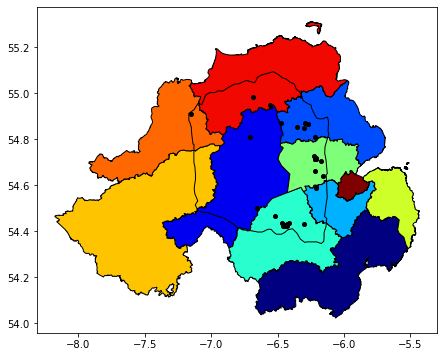

In [42]:
# Plotting multiple layers: area of interest 
fig, ax = plt.subplots(figsize=(10,6)) 
data.plot(ax = ax, color = "red", edgecolor = 'black', cmap= 'jet', column = 'districts')
area_of_interest.plot(ax = ax, color='none', edgecolor = 'black')
atms.plot(ax = ax, color = "black", markersize = 16)

In [43]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [44]:
area_of_interest.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [45]:
atms.crs 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [53]:
# Reprojecting: coordinate reference system 
districs = data.to_crs(epsg = 32629)
area_of_interest = area_of_interest.to_crs(epsg = 32629)

In [47]:
districs.crs   

<Projected CRS: EPSG:32629>
Name: WGS 84 / UTM zone 29N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 12°W and 6°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Côte D'Ivoire (Ivory Coast). Faroe Islands. Guinea. Ireland. Jan Mayen. Mali. Mauritania. Morocco. Portugal. Sierra Leone. Spain. United Kingdom (UK). Western Sahara.
- bounds: (-12.0, 0.0, -6.0, 84.0)
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

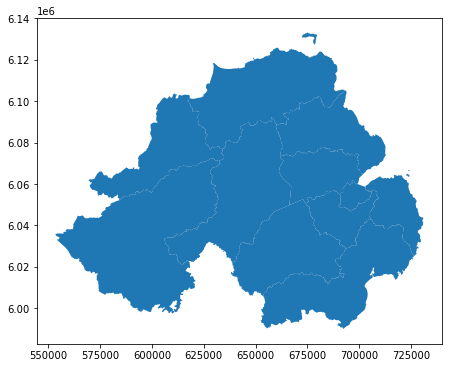

In [49]:
districs.plot(figsize = (10,6)) 

In [54]:
# overlays 
df = gpd.overlay(districs, area_of_interest, how="intersection")

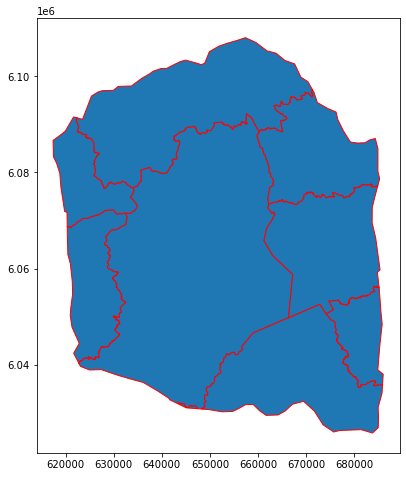

In [58]:
df.plot(edgecolor = "red", figsize = (10,8)) 